In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

from datetime import datetime
from hts import HTSRegressor
from hts.utilities.load_data import load_hierarchical_sine_data
import hts.functions
import collections
from hts.hierarchy import HierarchyTree

ModuleNotFoundError: No module named 'prophet'

## Hierarchical ARIMA by ags2 and ags5 

In [19]:
df = pd.read_csv('./../final_dfs/for_modeling/df_final_date_wide_with_cluster.csv', converters={'cluster': str, 'ags5': str}) 
df = df[['cluster','ags5','unemployment_rate', 'date']]
df

,cluster,ags5,unemployment_rate,date
0,0,01001,8.2,2019-01-01
1,0,01001,7.8,2019-02-01
2,0,01001,7.8,2019-03-01
3,0,01001,7.6,2019-04-01
4,0,01001,7.7,2019-05-01
...,...,...,...,...
11223,0,16077,6.7,2020-12-01
11224,0,16077,7.3,2021-01-01
11225,0,16077,7.3,2021-02-01
11226,0,16077,7.2,2021-03-01


create dictionary to specify hierarcy: 

In [20]:
d = df.groupby('cluster')['ags5'].apply(lambda x: list(set(x))).to_dict()
d

{'0': ['08421',
  '05316',
  '09572',
  '03151',
  '08315',
  '07133',
  '10046',
  '16062',
  '09372',
  '01051',
  '08136',
  '05558',
  '09775',
  '16065',
  '08117',
  '12053',
  '09678',
  '09274',
  '03359',
  '08327',
  '03401',
  '08425',
  '09671',
  '14626',
  '01061',
  '05974',
  '03252',
  '09373',
  '12062',
  '09673',
  '12072',
  '14522',
  '07318',
  '09277',
  '08417',
  '15081',
  '06440',
  '07140',
  '08128',
  '05966',
  '09174',
  '12063',
  '03356',
  '16072',
  '09161',
  '03402',
  '01057',
  '09679',
  '07132',
  '09571',
  '03353',
  '07339',
  '14524',
  '09173',
  '08211',
  '08436',
  '09574',
  '15088',
  '03256',
  '09273',
  '16052',
  '05958',
  '09463',
  '09363',
  '16067',
  '03159',
  '05166',
  '09772',
  '07334',
  '10043',
  '12061',
  '07332',
  '08326',
  '12060',
  '07111',
  '08237',
  '06632',
  '07335',
  '09675',
  '03251',
  '03103',
  '08231',
  '08435',
  '08337',
  '09779',
  '15001',
  '06635',
  '09263',
  '09778',
  '05366',
  '16

In [21]:
level_names = ['cluster', 'ags5']
hierarchy = [['cluster'], ['ags5']]
df_wide, sum_mat, sum_mat_labels = hts.functions.get_hierarchichal_df(df,
                                                                    level_names=level_names,
                                                                    hierarchy=hierarchy,
                                                                    date_colname='date',
                                                                    val_colname='unemployment_rate')
df_wide

cluster_ags5,0_01001,0_01004,0_01051,0_01053,0_01054,0_01055,0_01056,0_01057,0_01058,0_01059,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,8.2,8.3,6.4,4.9,6.3,6.3,4.8,4.7,4.3,4.7,...,6.2,3.9,5.5,4.5,4.2,5.9,4.8,5.5,5.3,8.0
2019-02-01,7.8,8.2,6.3,5.0,6.3,6.2,4.8,4.5,4.2,4.6,...,6.1,3.7,5.5,4.4,4.0,5.9,4.7,5.4,5.2,8.0
2019-03-01,7.8,8.0,6.0,4.8,5.5,5.6,4.6,4.3,4.0,4.4,...,5.7,3.4,5.3,4.2,3.7,5.7,4.4,5.2,4.9,7.6
2019-04-01,7.6,7.9,5.5,4.6,4.5,4.8,4.5,4.0,3.9,4.3,...,5.3,3.2,4.9,4.0,3.7,5.3,4.2,4.8,4.6,7.2
2019-05-01,7.7,8.0,5.2,4.6,4.2,4.5,4.5,3.9,4.0,4.2,...,5.4,3.2,4.7,3.9,3.7,5.3,4.1,4.6,4.5,7.1
2019-06-01,7.7,7.9,5.0,4.5,4.1,4.4,4.5,3.8,3.8,4.2,...,5.2,3.2,4.7,3.8,3.6,5.1,3.9,4.5,4.4,7.0
2019-07-01,8.1,8.0,5.2,4.8,4.3,4.6,4.7,4.0,4.1,4.4,...,5.2,3.3,4.8,3.9,3.7,5.2,3.9,4.5,4.5,7.0
2019-08-01,8.3,7.9,5.3,4.7,4.1,4.5,4.5,3.9,4.0,4.3,...,5.5,3.4,4.9,4.0,3.8,5.2,4.1,4.5,4.5,7.0
2019-09-01,8.3,7.6,5.1,4.6,4.0,4.3,4.3,3.8,3.8,4.1,...,5.3,3.2,4.7,3.8,3.8,4.9,3.9,4.1,4.4,6.5


add columns with the total and sum for each bundesland: 

In [22]:
df_wide['total'] = df_wide.sum(axis=1)
for key in d.keys():
    df_wide[key] = df_wide[[col for col in df_wide.columns if col.startswith(key)]].sum(axis=1)

In [23]:
df_wide.index = pd.to_datetime(df_wide.index)

add total to dict:

In [24]:
d['total'] = list(d.keys())

create tree to hierarcy:

In [93]:
ht = HierarchyTree.from_nodes(d, df_wide)
print(ht)

Exception ignored in: <function tqdm.__del__ at 0x7fc8591254c0>
Traceback (most recent call last):
  File "/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/tqdm/std.py", line 1144, in __del__
    def __del__(self):
KeyboardInterrupt: 


KeyboardInterrupt: 

train the model: 

In [30]:
hp = HTSRegressor(model='prophet', revision_method='BU', n_jobs=0)
hp.fit(df_wide, d)

Fitting models:   0%|          | 0/405 [00:00<?, ?it/s]Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:   0%|          | 1/405 [00:01<13:11,  1.96s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:   0%|          | 2/405 [00:02<06:36,  1.02it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to over

INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:   6%|▌         | 24/405 [00:12<03:21,  1.89it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:   6%|▌         | 25/405 [00:13<03:13,  1.96it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:   6%|▋         | 26/405 [00:13<03:05,  2.04it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  12%|█▏        | 48/405 [00:24<03:11,  1.87it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  12%|█▏        | 49/405 [00:24<03:03,  1.94it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  12%|█▏        | 50/405 [00:25<02:44,  2.16it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with w

Fitting models:  18%|█▊        | 71/405 [00:34<02:16,  2.45it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  18%|█▊        | 72/405 [00:35<02:14,  2.48it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  18%|█▊        | 73/405 [00:35<02:18,  2.40it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greate

INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  23%|██▎       | 95/405 [00:45<02:10,  2.38it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  24%|██▎       | 96/405 [00:45<01:58,  2.60it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  24%|██▍       | 97/405 [00:46<02:13,  2.30it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  29%|██▉       | 119/405 [00:56<02:34,  1.85it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  30%|██▉       | 120/405 [00:56<02:18,  2.06it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  30%|██▉       | 121/405 [00:57<02:09,  2.19it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet wit

Fitting models:  35%|███▌      | 142/405 [01:05<01:50,  2.38it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  35%|███▌      | 143/405 [01:05<01:47,  2.44it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  36%|███▌      | 144/405 [01:06<01:48,  2.41it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints gre

INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  41%|████      | 166/405 [01:49<01:35,  2.50it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  41%|████      | 167/405 [01:50<01:58,  2.00it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  41%|████▏     | 168/405 [01:50<01:57,  2.02it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet wi

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  47%|████▋     | 190/405 [02:01<01:49,  1.96it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  47%|████▋     | 191/405 [02:02<01:49,  1.96it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  47%|████▋     | 192/405 [02:02<01:41,  2.09it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet wit

Fitting models:  53%|█████▎    | 213/405 [02:12<01:45,  1.82it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  53%|█████▎    | 214/405 [02:13<01:38,  1.95it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  53%|█████▎    | 215/405 [02:13<01:33,  2.04it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints gre

INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  59%|█████▊    | 237/405 [02:23<01:16,  2.20it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  59%|█████▉    | 238/405 [02:23<01:12,  2.29it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  59%|█████▉    | 239/405 [02:24<01:22,  2.01it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet wi

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  64%|██████▍   | 261/405 [02:35<01:17,  1.87it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  65%|██████▍   | 262/405 [02:36<01:57,  1.22it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  65%|██████▍   | 263/405 [02:37<01:40,  1.41it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet wit

Fitting models:  70%|███████   | 284/405 [02:47<00:48,  2.51it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  70%|███████   | 285/405 [02:48<00:46,  2.60it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  71%|███████   | 286/405 [02:48<00:43,  2.71it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints gre

INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  76%|███████▌  | 308/405 [02:57<00:42,  2.29it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  76%|███████▋  | 309/405 [02:57<00:37,  2.56it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  77%|███████▋  | 310/405 [02:58<00:36,  2.58it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet wi

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  82%|████████▏ | 332/405 [03:07<00:33,  2.17it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  82%|████████▏ | 333/405 [03:07<00:33,  2.16it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  82%|████████▏ | 334/405 [03:08<00:36,  1.96it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet wit

Fitting models:  88%|████████▊ | 355/405 [03:56<00:26,  1.89it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  88%|████████▊ | 356/405 [03:56<00:25,  1.91it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  88%|████████▊ | 357/405 [03:57<00:25,  1.89it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints gre

INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  94%|█████████▎| 379/405 [04:07<00:14,  1.81it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  94%|█████████▍| 380/405 [04:07<00:13,  1.82it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models:  94%|█████████▍| 381/405 [04:08<00:13,  1.83it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet wi

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models: 100%|█████████▉| 403/405 [04:18<00:00,  2.16it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models: 100%|█████████▉| 404/405 [04:19<00:00,  2.21it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
Fitting models: 100%|██████████| 405/405 [04:19<00:00,  1.56it/s]


HTSRegressor(n_jobs=0,
             revision_method=<hts.revision.RevisionMethod object at 0x7fca3a825f70>)

try another approach to train the model: 

In [66]:
#hp = HTSRegressor(model='sarimax', revision_method='BU', n_jobs=0, order=(2,2,2))
#hp.fit(df_wide, d)

Fitting models:   0%|          | 0/405 [00:00<?, ?it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Fitting models:   4%|▍         | 16/405 [00:01<00:47,  8.11it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Fitting models:   7%|▋         | 28/405 [00:03<00:51,  7.35it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax

Fitting models:  75%|███████▍  | 302/405 [00:35<00:11,  9.20it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Fitting models:  76%|███████▌  | 308/405 [00:36<00:12,  7.88it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Fitting models:  79%|███████▉  | 321/405 [00:37<00:09,  8.91it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Fitting models:  88%|████████▊ | 358/405 [00:42<00:05,  8.63it/s]/Users/amitsasson/venv/

HTSRegressor(model='sarimax', n_jobs=0,
             revision_method=<hts.revision.RevisionMethod object at 0x7fc82ce3f490>)

In [31]:
hp.predict(steps_ahead=8)

Fitting models: 100%|██████████| 405/405 [09:21<00:00,  1.39s/it]
INFO:hts.core.regressor:Reconciling forecasts using <hts.revision.RevisionMethod object at 0x7fca3a825f70>


,total,0,1,2,08421,05316,09572,03151,08315,07133,...,16051,09761,05114,03241,05382,09564,06611,03101,05554,07314
2019-01-01,1955.783054,625.957949,1306.257104,1884.389637,3.066329,7.179050,1.831482,4.207400,2.593815,5.819528,...,5.425866,4.631812,9.981146,6.584935,4.938670,5.005476,7.341830,5.272103,3.366461,7.831836
2019-02-01,1914.417486,612.110746,1277.823651,1845.024749,2.956416,7.048649,1.790312,4.139503,2.587027,5.571998,...,5.542904,4.555205,9.865643,6.433275,4.794786,4.844340,7.313742,5.079084,3.267952,7.757618
2019-03-01,1942.526159,617.246335,1298.236314,1872.802481,3.241649,7.299391,1.773559,4.030515,2.772977,5.554180,...,5.818002,4.845367,10.111935,6.468908,4.844348,5.213255,7.459673,5.085625,3.361592,7.914980
2019-04-01,1841.855344,580.187936,1234.144587,1777.163919,3.116445,7.109064,1.760011,3.869044,2.541684,5.288837,...,5.706494,4.703560,9.949750,6.274233,4.768223,5.073624,7.174608,4.884985,3.350112,7.824459
2019-05-01,1882.271457,590.180347,1257.148178,1818.270664,3.338865,7.228628,1.880976,4.010689,2.735651,5.329177,...,5.856846,4.987088,10.234899,6.519261,4.910119,5.317318,7.437122,4.936299,3.403829,8.192642
2019-06-01,1882.207697,588.893395,1254.107704,1819.255850,3.325748,7.234331,1.833144,4.017943,2.807640,5.431804,...,5.794964,4.997327,10.029071,6.412621,4.810244,5.361310,7.348303,4.825002,3.467435,8.414280
2019-07-01,1942.951205,606.159104,1289.179119,1879.091449,3.481622,7.438602,1.967518,4.120903,2.849583,5.627798,...,6.091369,5.169764,10.321458,6.606120,4.910166,5.576232,7.548305,5.014393,3.704543,8.429564
2019-08-01,1984.135152,618.727618,1306.818336,1919.460302,3.887828,7.538935,2.072746,4.218635,3.046832,5.617717,...,6.216677,5.579822,10.412701,6.600708,5.009397,5.827535,7.536683,5.105899,3.902915,8.434879
2019-09-01,1900.908273,592.996415,1254.960642,1838.873088,3.773829,7.039602,2.066415,3.913711,3.026630,5.406073,...,6.009308,5.465801,10.106419,6.397809,4.909185,5.647731,7.120297,4.802230,3.584707,8.232634
2019-10-01,1852.957354,580.140409,1228.864439,1791.893188,3.713966,7.336140,1.932300,3.805499,2.769068,5.293841,...,5.729435,5.092885,10.002687,6.297946,4.808536,5.389835,7.099508,4.703476,3.434097,8.220053


Calaulate in sample MSE for the kreise

In [32]:
resid = hp.hts_result.residuals
def entries_to_remove(entries, the_dict):
    for key in entries:
        if key in the_dict:
            del the_dict[key]
    return the_dict

resid = entries_to_remove(list(d.keys()), resid)
resid = list(resid.values()) 
resid = [item for sublist in resid for item in sublist]
(np.array(resid)**2).mean()

0.0371130463588562

In [33]:
clusters = df["cluster"].unique().tolist()
clusters

['0', '2', '1']

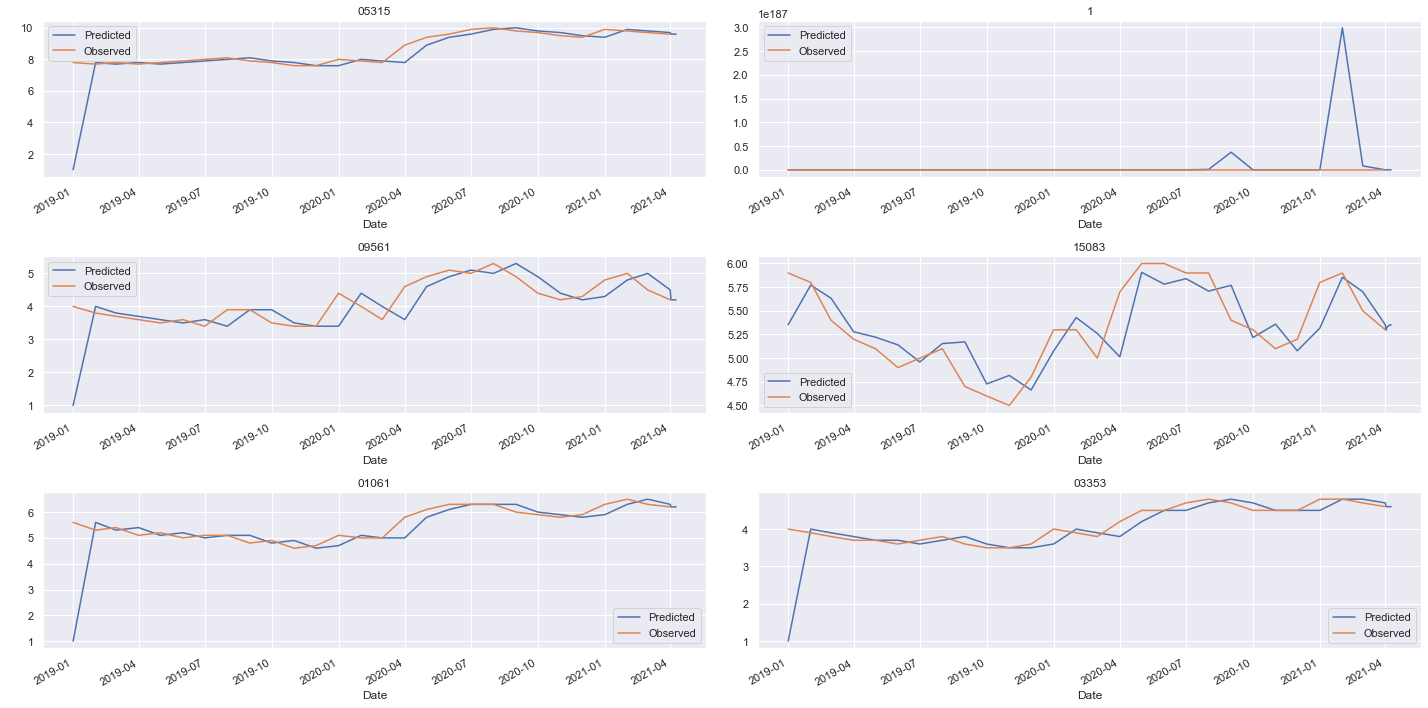

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

def plot_results(cols, axes, preds):
    axes = np.hstack(axes)
    for ax, col in zip(axes, cols):
        preds[col].plot(ax=ax, label="Predicted")
        df_wide[col].plot(ax=ax, label="Observed")

        ax.legend()
        ax.set_title(col)
        ax.set_xlabel("Date")
        ax.set_ylabel(" ")
    
plot_results(['05315','1','09561','15083','01061','03353'], axes, predicted)
plt.tight_layout()

## Try multivariate (dont read that, only a draft): 

In [59]:
exogenous = {k: ['unemployment_rate', 'number_of_companies_administration'] for k in df.columns if k not in ['unemployment_rate', 'number_of_companies_administration']}
ht = HierarchyTree.from_nodes(d, df, exogenous=exogenous)
print(ht)

KeyError: "None of [Index(['total'], dtype='object')] are in the [columns]"

In [ ]:
resid = hp.hts_result.residuals
def entries_to_remove(entries, the_dict):
    for key in entries:
        if key in the_dict:
            del the_dict[key]
    return the_dict

resid = entries_to_remove(list(d.keys()), resid)
resid = list(resid.values()) 
resid = [item for sublist in resid for item in sublist]
(np.array(resid)**2).mean()

In [ ]:
df = pd.read_csv('./../final_dfs/for_modeling/df_final_date_wide.csv', converters={'ags2': str, 'ags5': str}) 
df = df[['ags2','ags5','unemployment_rate', 'date', 'number_of_companies_administration']]

In [ ]:
level_names = ['ags2', 'ags5']
hierarchy = [['ags2'], ['ags5']]
df_wide, sum_mat, sum_mat_labels = hts.functions.get_hierarchichal_df(df,
                                                                    level_names=level_names,
                                                                    hierarchy=hierarchy,
                                                                    date_colname='date',
                                                                    val_colname=['unemployment_rate','number_of_companies_administration'])
df_wide